In [2]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import io
import webuiapi

import csv

# 画像を読み込む下準備-------------------------------------------------------------------------------

# WFLWのアノテーションデータの読み込み
annotation_data_path = "/root/dataset/WFLW/WFLW_annotations/list_98pt_rect_attr_train_test/list_98pt_rect_attr_train.txt"
WFLW_images = "/root/dataset/WFLW/WFLW_images"

# 生成したデータの保存先 画像&csv
image_save_path = "/root/dataset/generated_images_dataset/image"
annotation_save_path = "/root/dataset/generated_images_dataset/annotations"

# CSVの読み込みとリスト化
anotation_data_lists = [] # 画像データと座標データがまとめられたリスト
with open(annotation_data_path) as f:
    anotation_data = f.readlines()

for i in anotation_data:
    anotation_data_lists.append(i.split(" "))

# stable diffsuion web APIの用意
api = webuiapi.WebUIApi(host='192.168.0.50', port=7860)
# anotation_data_lists

orig_image_size_x,orig_image_size_y 1024 1024
input_control_image_size (162, 162)


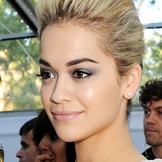

black_image.size (162, 162)


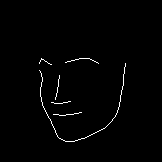

orig_image_size_x,orig_image_size_y 1024 1486
input_control_image_size (162, 162)


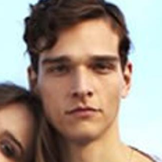

black_image.size (162, 162)


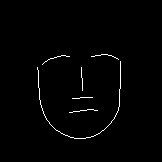

orig_image_size_x,orig_image_size_y 1024 786
input_control_image_size (162, 162)


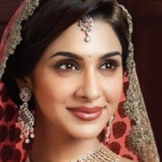

black_image.size (162, 162)


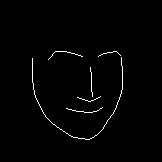

orig_image_size_x,orig_image_size_y 1024 1280
input_control_image_size (162, 162)


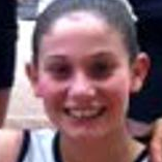

black_image.size (162, 162)


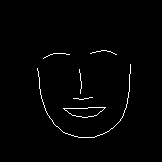

orig_image_size_x,orig_image_size_y 1024 1296
input_control_image_size (162, 162)


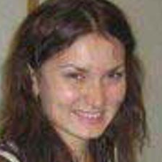

black_image.size (162, 162)


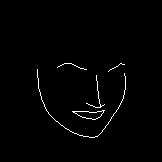

In [29]:
# パラメータ類----------------------------------------------------------------------------------------
load_image_num = range(5) # csvの列ナンバー
# 画像のクロップマージンの画像サイズに対する割合
mergin_per = 0.2
input_control_image_size = (162,162)

for image_num in load_image_num:

    # 入力データの加工--------------------------------------------------------------------------------------
    image_name = anotation_data_lists[image_num][-1].replace("\n","")
    image_path = WFLW_images + "/" + image_name
    image = Image.open(image_path)
    orig_image_size_x,orig_image_size_y = image.size #オリジナルの画像データのサイズ（ランドマークの座標変換のときに使う）
    print("orig_image_size_x,orig_image_size_y",orig_image_size_x,orig_image_size_y)
    bounding_box_data = tuple([int(bdbox) for bdbox in anotation_data_lists[image_num][-11:-7]])
    face_width = bounding_box_data[2]-bounding_box_data[0]
    face_height = bounding_box_data[3]-bounding_box_data[1]
    
    #顔の中心座標
    face_center_x = float((bounding_box_data[2]+bounding_box_data[0]) / 2)
    face_center_y = float((bounding_box_data[3]+bounding_box_data[1]) / 2)

    # コントロールネット用の画像のクロップとリサイズ
    margin_pix = float((face_width+face_height) / 2 * mergin_per)
    half_long_side = max(face_width,face_height) / 2
    image_size = margin_pix + half_long_side
    crop_coordinates = (
        face_center_x-image_size,
        face_center_y-image_size,
        face_center_x+image_size,
        face_center_y+image_size
    )
    
    input_control_image = image.crop(crop_coordinates)
    croped_image_size_x,croped_image_size_y = input_control_image.size
    input_control_image = input_control_image.resize(input_control_image_size)
    print("input_control_image_size",input_control_image.size)
    input_control_image.show()
    
    #scribble用の白黒画像の作成と表示---------------------------------------------------------------------------------
    black_image = Image.new('RGB', input_control_image.size, "black")
    draw = ImageDraw.Draw(black_image)
    
    orig_landmark_coordinates = anotation_data_lists[image_num][0:196]
    transformed_coordinates_scribble = []
    for landmark_num in range(0, len(orig_landmark_coordinates),2):        
        transformed_x = (float(orig_landmark_coordinates[landmark_num])-crop_coordinates[0]) * (input_control_image_size[0] / croped_image_size_x)
        transformed_y = (float(orig_landmark_coordinates[landmark_num+1])-crop_coordinates[1]) * (input_control_image_size[1] / croped_image_size_y)
        transformed_coordinates_scribble.append((transformed_x,transformed_y))
    draw.line(transformed_coordinates_scribble[0:33], fill="white",width=1) # 輪郭
    draw.line(transformed_coordinates_scribble[33:38], fill="white",width=1) # 左眉
    draw.line(transformed_coordinates_scribble[42:47], fill="white",width=1) # 右眉
    draw.line(transformed_coordinates_scribble[51:55], fill="white",width=1) # 鼻筋
    draw.line(transformed_coordinates_scribble[55:60], fill="white",width=1) # 鼻下
    draw.line(transformed_coordinates_scribble[88:96], fill="white",width=1) # 口
    draw.line([transformed_coordinates_scribble[88],transformed_coordinates_scribble[95]], fill="white",width=1) # 口
    print("black_image.size",black_image.size)
    black_image.show()